In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Early Stopping:
Keras can automatically stop training based on a loss condition on the validation data passed during the model.fit() call

# Dropout Layers:
Dropout can be added to layers to "turn off" neurons during training to prevent overfitting. E
Each Dropout layer will "drop" a user-define percentage of neuron units in the previous layer every batch. 

In [2]:
df = pd.read_csv('../DATA/cancer_classification.csv')

# EDA

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

There are no null values in our dataframe

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


We transpose the .describe() method just to make it easier for us to read.

For classification tasks, its a good idea to run countplots of your classified labels to see how many instances are there for every label. 

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

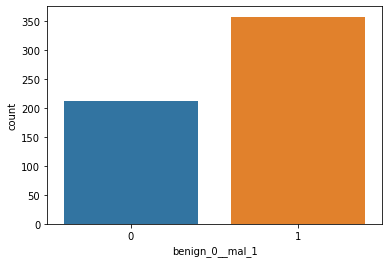

In [9]:
sns.countplot(x = 'benign_0__mal_1', data = df)

So this clearly means that we have more instances of malignant tumours than there are of benign. 

In [12]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

So we can see that what all features are all positively correlated with our malignant tumours. 

We can also plot this above correlation using a bar plot:

<AxesSubplot:>

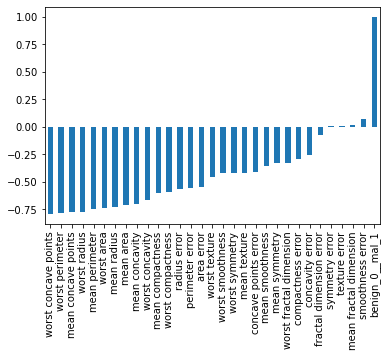

In [13]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind = 'bar')

Now the last label column has correlation of 1 as its the correlation wrt to itself. So we can go ahead and drop it completely. 

<AxesSubplot:>

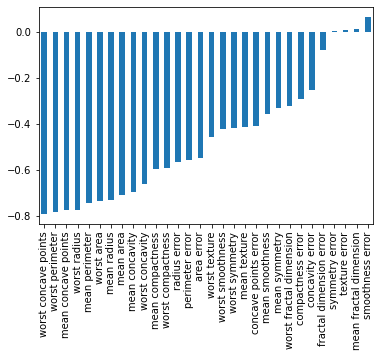

In [14]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind = 'bar')

<AxesSubplot:>

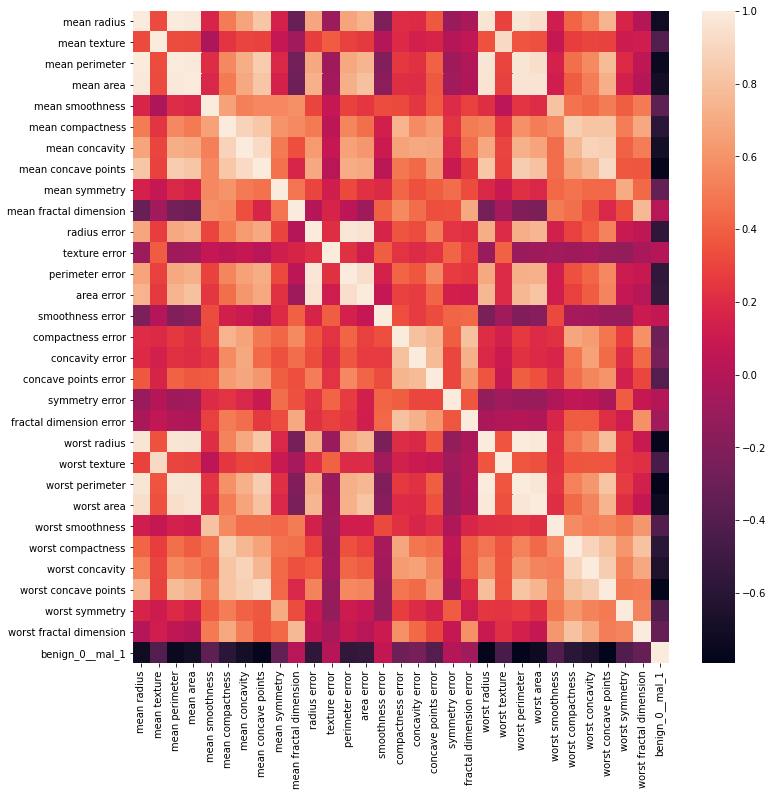

In [16]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr())

# Model

In [19]:
X = df.drop('benign_0__mal_1', axis = 1).values
y = df['benign_0__mal_1'].values

In [20]:
from sklearn.model_selection import train_test_split


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()

In [24]:
X_train = scaler.fit_transform(X_train)

In [25]:
X_test = scaler.transform(X_test)

In [26]:
from tensorflow.keras.models import Sequential

In [27]:
from tensorflow.keras.layers import Dense, Dropout

In [29]:
X_train.shape

(426, 30)

In [32]:
model = Sequential()

model.add(Dense(30,activation = 'relu'))
model.add(Dense(15,activation = 'relu'))

#BINARY CLASSIFICATION
model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

Sigmoid is the activation for the last layer for binary classification problems.

In [33]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data = (X_test, y_test))

Epoch 1/600
14/14 [==============================] - 1s 16ms/step - loss: 0.6935 - val_loss: 0.6760
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6611 - val_loss: 0.6443
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6255 - val_loss: 0.6043
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5789 - val_loss: 0.5550
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5291 - val_loss: 0.5042
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4785 - val_loss: 0.4498
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4319 - val_loss: 0.3994
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3913 - val_loss: 0.3603
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3486 - val_loss: 0.3212
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3164 - val_loss: 0.2963
Epoch 11

In [36]:
losses = pd.DataFrame(model.history.history)

Now we can plot the data to see how the validation loss and loss for the training set are behaving. 

<AxesSubplot:>

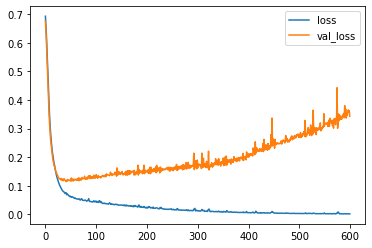

In [37]:
losses.plot()

Now we can see that during the first couple of epochs, both validation and training loss are decreasing. The training loss is still going down after some time ,but the validation loss is increasing at a very high pace. This is a clear indication that we are overfitting our data by running through too many epochs. So we need to stop the training at some particular point to ensure that there is no overfitting. 

In [49]:
model = Sequential()

model.add(Dense(30,activation = 'relu'))
model.add(Dense(15,activation = 'relu'))

#BINARY CLASSIFICATION
model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

We redefined the model above by copy pasting the code from the previous definition of the model.

In [50]:
from tensorflow.keras.callbacks import EarlyStopping

In [51]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 |        to qualify 

In [52]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)

The monitor string tells us what parameter we want to do early stopping for, the mode parameter is to tell what we want to do with the monitored data i.e we want to minimise the loss here, so the mode is min. If we wanted to maximise the accuracy then mode = max. Otherwise we can use auto to let keras decide what to do based on the string in the monitor argument.

Verbose is just for the computer to tell us what it's doing with the data. 
Patience - This is the number of epochs without improvement after which training will be early stopped. A larger patience means that an experiment will wait longer before stopping an experiment. This is used if there is some disturbance in the plot of the validation or training loss

In [53]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data = (X_test, y_test), callbacks = [early_stop] )

Epoch 1/600
14/14 [==============================] - 1s 24ms/step - loss: 0.6988 - val_loss: 0.6842
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6570 - val_loss: 0.6493
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6244 - val_loss: 0.6146
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5844 - val_loss: 0.5761
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5504 - val_loss: 0.5454
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5204 - val_loss: 0.5160
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4915 - val_loss: 0.4875
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4647 - val_loss: 0.4606
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4391 - val_loss: 0.4348
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4154 - val_loss: 0.4095
Epoch 11

We can see that our epochs has stopped at 28 itself after applying early stopping. Thus this method is useful to find out the exact number of epochs to run the model through to ensure that there is no overfitting.

<AxesSubplot:>

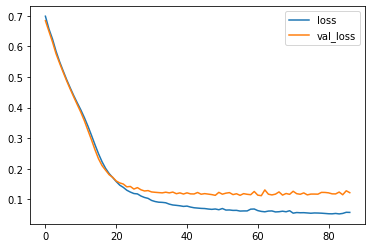

In [54]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

Even though the training and validation loss aren't tracing each other after 20 epochs, its fine because both curves are flattening and not increasing with increase in number of epochs.

### Another way to improve the problem of overfitting is to add in Dropout layers

In [55]:
from tensorflow.keras.layers import Dropout

In [56]:
model = Sequential()

model.add(Dense(30,activation = 'relu'))
model.add(Dropout(rate = 0.5))
#The rate parameter tells us the probability of randomly turning off the actual neurons.
#It's the fraction of which you're randomly turning them off. 
#Its always between 0 and 1. Best between 0.2 to 0.5          
model.add(Dense(15,activation = 'relu'))
model.add(Dropout(rate = 0.5))
#BINARY CLASSIFICATION
model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [57]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data = (X_test, y_test), callbacks = [early_stop] )

Epoch 1/600
14/14 [==============================] - 1s 13ms/step - loss: 0.7249 - val_loss: 0.6957
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.7010 - val_loss: 0.6781
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6751 - val_loss: 0.6643
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6661 - val_loss: 0.6493
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6551 - val_loss: 0.6350
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6343 - val_loss: 0.6142
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6249 - val_loss: 0.5887
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5985 - val_loss: 0.5589
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5743 - val_loss: 0.5306
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5569 - val_loss: 0.5070
Epoch 11

<AxesSubplot:>

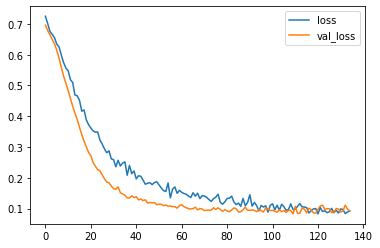

In [58]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

### Model Evaluation

In [70]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [71]:
from sklearn.metrics import classification_report, confusion_matrix

In [72]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [73]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]
